# Vektörler / Matrsiler / Tensörler

---

Derin öğrenme için gerekli olan temel matematik bilgisi içinde lineer cebir (linear algebra) 



![](https://res.cloudinary.com/practicaldev/image/fetch/s--oTgfo1EL--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0201a.png)

## VEKTÖRLER

In [ ]:
import numpy as np

a = np.array(18) #skaler değer 0 boyutlu tensordür
a

array(18)

In [ ]:
a.ndim #skaler 0 eksen

0

In [ ]:
a = np.array([18, 6, 2, 16, 8]) # vektör 1 Boyutlu vektör
a.ndim 

1

# MATRİSLER

In [ ]:
a = np.array([[33, 87, 21, 10, 7],
             [30, 89, 7, 4, 3],
             [27, 93, 14, 7, 1]]) #Matris 2 boyutlu tensördür

In [ ]:
a.ndim

2

## TENSORLER

In [ ]:
a = np.array([[[33, 87, 21, 10, 7], 
               [30, 89, 7, 4, 3], 
               [27, 93, 14, 7, 1]], 
              [[33, 87, 21, 10, 7], 
               [30, 89, 7, 4, 3], 
               [27, 93, 14, 7, 1]], 
              [[33, 87, 21, 10, 7], 
               [30, 89, 7, 4, 3], 
               [27, 93, 14, 7, 1]]]) 

In [ ]:
a.ndim #3 boyutlu tensör

3

### Görüntü verisinden örnek gösterim

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.ndim)

3


In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
print(train_images.dtype)

uint8


In [ ]:
digit = train_images[7] #Veri kümesinden bir örnek gösterim

<function matplotlib.pyplot.show>

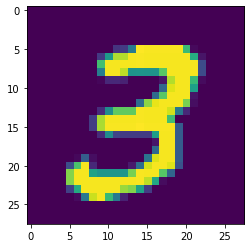

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show

In [ ]:
dizinim = train_images[7:77] # 7 ile 77 arasındaki örnekleri seçip bir dizine yazar

In [ ]:
print(dizinim.shape)

(70, 28, 28)


In [ ]:
dizinim = train_images[7:77, :, :]
dizinim.shape

(70, 28, 28)

## İŞLEMLER: 
* Eleman Temelli

Bu işlemler tensörün her elemanına ayrı ayrı uygulanır. 


In [ ]:
def naive_relu(x): #relu işlemi
  assert len(x.shape) == 2 # x'de 2 boyutlu bir numpy dizisi tanımlanır

  x = x.copy() # girdi tensörünün üzerine yazma işlemi için bu fonksiyon kullanılır.
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)

  return x

In [ ]:
x = np.array([[33, 87, 21, 10, 7],
             [30, 89, 7, 4, 3],
             [27, 93, 14, 7, 1]])
z = naive_relu(x)
z

array([[33, 87,  0, 10,  7],
       [30, 89,  7,  4,  3],
       [27, 93, 14,  7,  1]])

In [ ]:
def naive_add(x, y): #toplama işlemi
  assert len(x.shape) == 2
  assert x.shape == y.shape

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

In [ ]:
y = np.array([[33, 87, 21, 10, 7],
             [30, 89, 7, 4, 3],
             [27, 93, 14, 7, 1]])
z = naive_add(x, y)
z

array([[ 66, 174,  42,  20,  14],
       [ 60, 178,  14,   8,   6],
       [ 54, 186,  28,  14,   2]])

In [ ]:
import numpy as np # numpy kütüphanesini kullandığınızda bu işlemleri aşağıdaki gibi yapmak mümkün hale geliyor :)
x = np.array([[33, 87, 21, 10, 7],
             [30, 89, 7, 4, 3],
             [27, 93, 14, 7, 1]])

y = np.array([[33, 87, 21, 10, 7],
             [30, 89, 7, 4, 3],
             [27, 93, 14, 7, 1]])

z = np.maximum(z, 0.)
z

array([[ 66., 174.,  42.,  20.,  14.],
       [ 60., 178.,  14.,   8.,   6.],
       [ 54., 186.,  28.,  14.,   2.]])

In [ ]:
z = x + y
z

array([[ 66, 174,  42,  20,  14],
       [ 60, 178,  14,   8,   6],
       [ 54, 186,  28,  14,   2]])

* Yayma Operasyonu, 

In [ ]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]
  return x

In [ ]:
y = np.array([18, 6, 2, 16, 8]) 
z = naive_add_matrix_and_vector(x, y)
z

array([[51, 93, -1, 26, 15],
       [48, 95,  9, 20, 11],
       [45, 99, 16, 23,  9]])

In [ ]:
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

z = np.maximum(x, y)

In [ ]:
import numpy as np

x = np.array([[33, 87, 21, 10, 7],
             [30, 89, 7, 4, 3],
             [27, 93, 14, 7, 1]])
y = np.array([18, 6, 2, 16, 8])

z = np.dot(x, y)
z

array([1374, 1176, 1192])

In [ ]:
def naive_vector_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]

  z = 0.

  for i in range(x.shape[0]):
    z += x[i] * y[i]

  return z

In [ ]:
x = np.array([18, 6, 2, 16, 8])
y = np.array([18, 6, 2, 16, 8])
z = naive_vector_dot(x, y)
z

684.0

In [ ]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2 
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i]

  return x

In [ ]:
x = np.array([[33, 87, 21, 10, 7],
             [30, 89, 7, 4, 3],
             [27, 93, 14, 7, 1]])
y = np.array([18, 6, 2, 16, 8])


z = naive_add_matrix_and_vector(x, y)
z

array([[ 51, 105,  39,  28,  25],
       [ 36,  95,  13,  10,   9],
       [ 29,  95,  16,   9,   3]])

In [ ]:
import numpy as np

x = np.random.random((64, 3, 32, 10)) #boyutlu rastgele değerli tensor
y= np.random.random((32, 10)) #rastgele değerli tensor

z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

* İç Çarpım,

In [ ]:
import numpy as np
x = np.array([[33, 87, 21, 10, 7],
             [30, 89, 7, 4, 3],
             [27, 93, 14, 7, 1]])
y = np.array([18, 6, 2, 16, 8])
z = np.dot(x, y)
z

array([1374, 1176, 1192])

In [ ]:
def naive_vector_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]

  z = 0.

  for i in range(x.shape[0]):
    z += x[i] * y[i]

  return z

In [ ]:
x = np.array([18, 6, 2, 16, 8])
y = np.array([18, 6, 2, 16, 8])
z = naive_vector_dot(x, y)
z

684.0

In [ ]:
def naive_matrix_vector_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  z = np.zeros(x.shape[0])

  for i in range(x.shape[0]):
    for i in range(x.shape[1]):
      z[i] += x[i, j] * y[j]

  return z

In [ ]:
def naive_matrix_dot(x, y):
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i, :],  y)

  return z

In [ ]:
def naive_matrix_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2


  assert x.shape[1] == y.shape[0]

  z = np.zeros((x.shape[0], y.shape[1]))

  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i, :]
      column_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, column_y)
  return z

* Kanal / Şekil Değiştirme

In [ ]:
train_images = train_images.reshape(60000, 28 * 28)

x =np.array([[0., 1.],
            [2., 3.],
            [4., 5.]])

print(x)

[[0. 1.]
 [2. 3.]
 [4. 5.]]


In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [ ]:
x = np.zeros((100, 10))
x = np.transpose(x)
print(x.shape)

(10, 100)
